In [24]:


# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Model training & evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    silhouette_score, accuracy_score, confusion_matrix, classification_report
)



In [1]:
df = pd.read_csv(r"C:\Users\patro\Downloads\Project 2  - Spotify Songs’ Genre Segmentation (1) (1)\spotify dataset.csv") 
df.head()



NameError: name 'pd' is not defined

In [26]:

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [27]:

df = df.drop_duplicates()


df = df.fillna(df.mean(numeric_only=True))

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=np.number).columns
df_scaled = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)


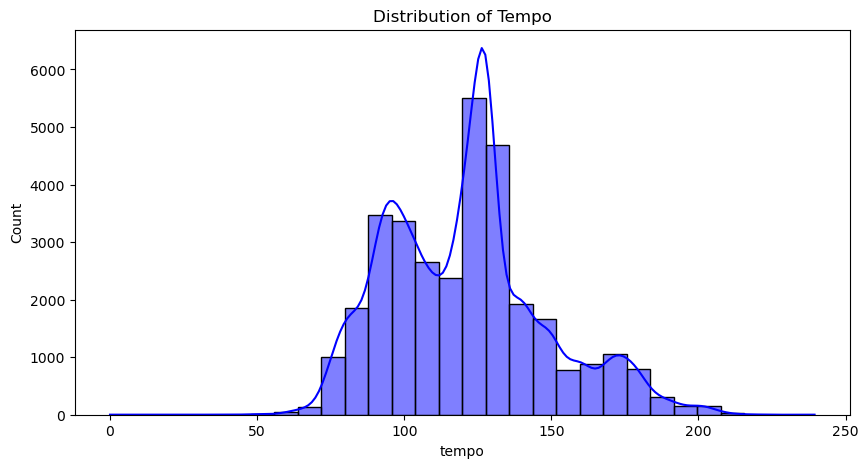

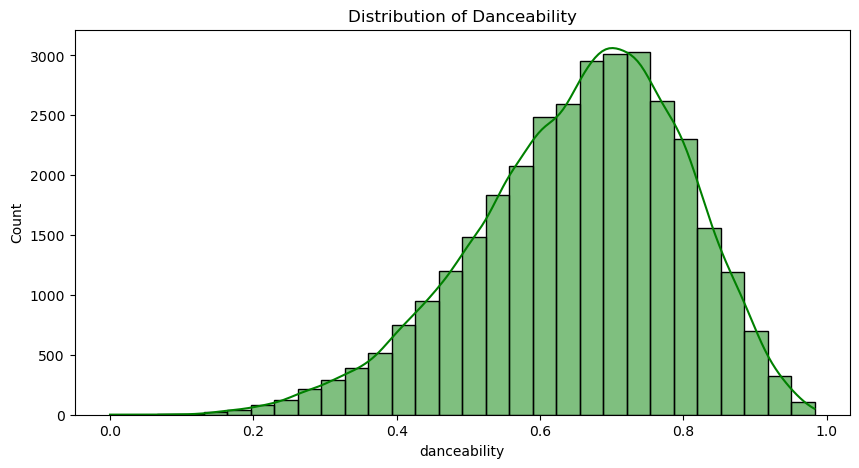

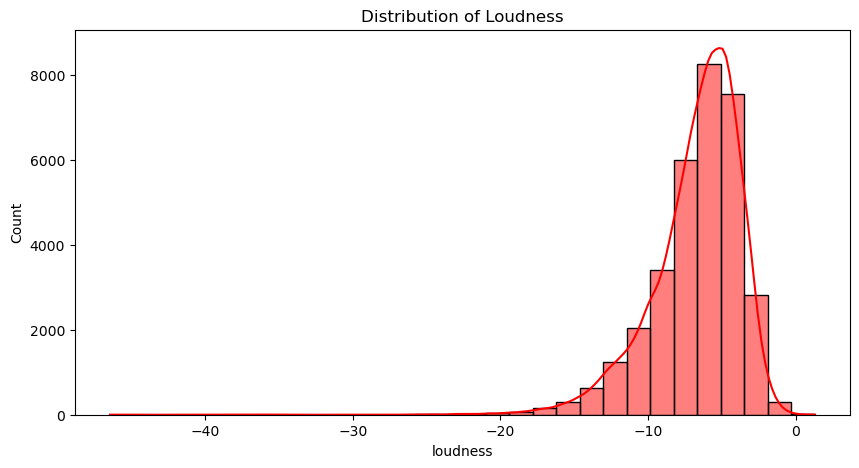

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['tempo'], bins=30, kde=True, color="blue")
plt.title("Distribution of Tempo")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['danceability'], bins=30, kde=True, color="green")
plt.title("Distribution of Danceability")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['loudness'], bins=30, kde=True, color="red")
plt.title("Distribution of Loudness")
plt.show()



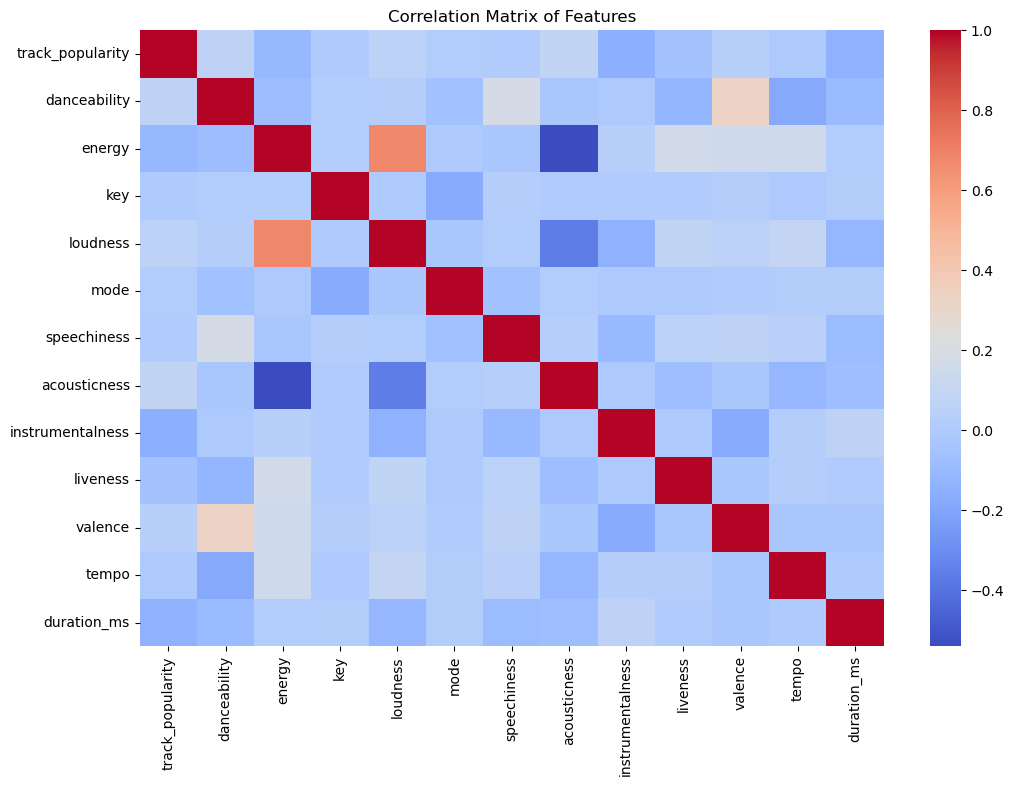

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Features")
plt.show()



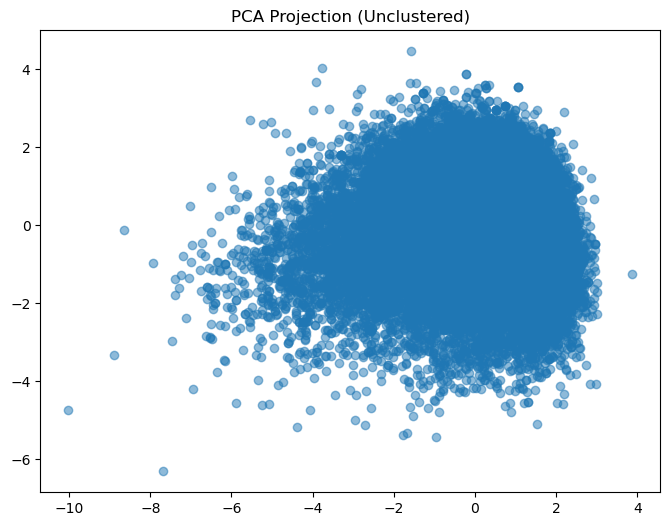

In [30]:
pca = PCA(2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], alpha=0.5)
plt.title("PCA Projection (Unclustered)")
plt.show()


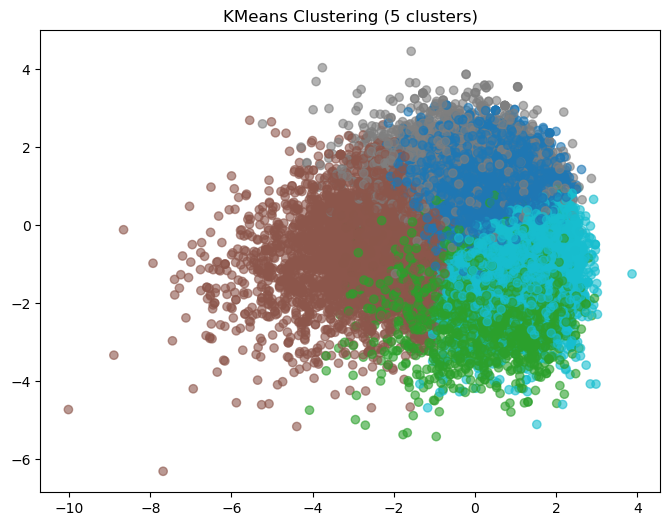

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], c=df['cluster'], cmap="tab10", alpha=0.6)
plt.title("KMeans Clustering (5 clusters)")
plt.show()


In [32]:
if 'playlist_genre' in df.columns:
    X = df_scaled
    y = df['playlist_genre']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         edm       0.52      0.62      0.56      1218
       latin       0.39      0.36      0.37      1033
         pop       0.33      0.26      0.29      1081
         r&b       0.41      0.39      0.40      1031
         rap       0.52      0.51      0.52      1168
        rock       0.56      0.65      0.60      1036

    accuracy                           0.47      6567
   macro avg       0.46      0.47      0.46      6567
weighted avg       0.46      0.47      0.46      6567



In [37]:
def recommend(song_index, num_recs=5):
    song_cluster = df.loc[song_index, 'cluster']
    similar_songs = df[df['cluster'] == song_cluster].sample(num_recs)
    return similar_songs[['track_name','playlist_genre']]



In [39]:

print(recommend(10, 5))

print(recommend(25, 3))


                       track_name playlist_genre
4285   looking around at the sky.            pop
16649      Tu Amor Es Como Un Río          latin
12739                 Any Day Now           rock
19624                  Superhéroe          latin
29764                  Young Love            edm
            track_name playlist_genre
26628              LFT            r&b
28272  Close Your Eyes            edm
23662           Shukar            r&b


In [40]:
# Recommendation system based on clustering

def recommend(song_index, num_recs=5):
    """
    Recommends similar songs based on the cluster of the given song index.
    song_index: index of the song in dataframe
    num_recs: number of recommendations
    """
    
    song_cluster = df.loc[song_index, 'cluster']
  
    similar_songs = df[df['cluster'] == song_cluster].sample(num_recs, replace=True)
    
    
    available_cols = [col for col in ['track_name','artist_name','playlist_genre'] if col in df.columns]
    return similar_songs[available_cols]


recommend(10, 5)


,track_name,playlist_genre
20396,Estamos Arriba,latin
18545,Mala y Peligrosa (feat. Bad Bunny),latin
4590,Wild Things,pop
30992,Don't Wanna Know,edm
27015,Punk'd,edm


In [41]:

print("Recommendations for song at index 25:")
print(recommend(25, 5))

print("\nRecommendations for song at index 50:")
print(recommend(50, 5))


Recommendations for song at index 25:
                               track_name playlist_genre
1735        Chloe (You're the One I Want)            pop
19434                          Ayer La Vi          latin
16396                           Alucinado          latin
8458                    Down to the River            rap
18413  Estoy Contigo (Pa Dónde Nos Vamos)          latin

Recommendations for song at index 50:
                           track_name playlist_genre
25616        Frustrations + Solutions            r&b
25032                Get It On Tonite            r&b
28819  We Got Love - Joel Corry Remix            edm
17464   Grow Up - Martin Jensen Remix          latin
20762                 Si No Te Quiere          latin
